<a href="https://colab.research.google.com/github/maudlcrf/deep_learning/blob/main/food_detection_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work

## Import libraries

In [1]:
!pip install roboflow

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/triton-3.2.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.4 kB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.7/848.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 

In [1]:
!pip uninstall -y torchvision


Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124


In [2]:
!pip install torchvision==0.18.0+cu118 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
import torchvision

print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ torchvision version: {torchvision.__version__}")


✅ PyTorch version: 2.3.0+cu118
✅ torchvision version: 0.18.0+cu118


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.1/107.7 GB disk)


In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
import os
import numpy as np
import matplotlib.image as mpimg

### **Install YOLO V 11** FIRST CHANGE

In [7]:
from ultralytics import YOLO
# Attempt to download the model weights if they don't exist locally
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.1MB/s]


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import yaml

## Import dataset

Importing the dataset with the API generated by Roboflow with Mayra's account

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="cBLWWZ4l2OGfXB6ucqNy")
project = rf.workspace("rahmanouri").project("objects_detection-t7zsg")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Objects_Detection--3 in yolov11:: 100%|██████████| 20674/20674 [00:07<00:00, 2775.64it/s]


In [10]:
print(f"✅ Dataset is located at: {dataset.location}")


✅ Dataset is located at: /content/datasets/Objects_Detection--3


Looking what is inside the path we imported.

#### Directory contents:
- 'valid': Directory containing validation images (images used to validate the model during training).
- 'README.dataset.txt': Text file with dataset-related information or instructions from Roboflow.
- 'train': Directory containing training images (images used to train the model).
- 'test': Directory containing test images (images used to evaluate the model's performance after training).
- 'data.yaml': YAML configuration file containing dataset-specific information such as class names, image size, etc.
- 'README.roboflow.txt': Text file with Roboflow-specific information or instructions, often regarding how the dataset was created or annotated.

In [11]:
dataset_path = "Objects_Detection--3"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("Dataset directory exists!")
    print("Contents:")
    print(os.listdir(dataset_path))  # List files in the directory
else:
    print("Dataset directory not found!")

Dataset directory exists!
Contents:
['data.yaml', 'README.dataset.txt', 'test', 'train', 'README.roboflow.txt', 'valid']


The following code shows the number of elements in each folder.

In [12]:
def count_images(directory):
    """Count the number of image files in the given directory."""
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']  # List of common image file extensions
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Counting images in each directory
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)

# Display the counts
print(f"Train Set: {train_count} images")
print(f"Valid Set: {valid_count} images")
print(f"Test Set: {test_count} images")

Train Set: 9248 images
Valid Set: 667 images
Test Set: 416 images


With the following code the first images per each folder are displayed.

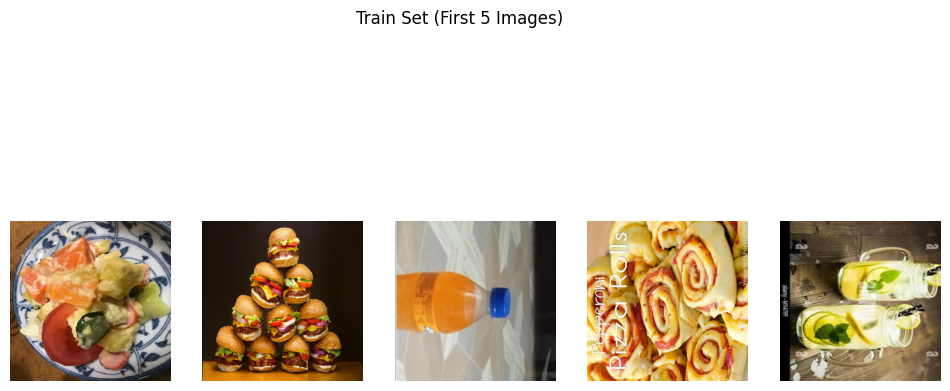

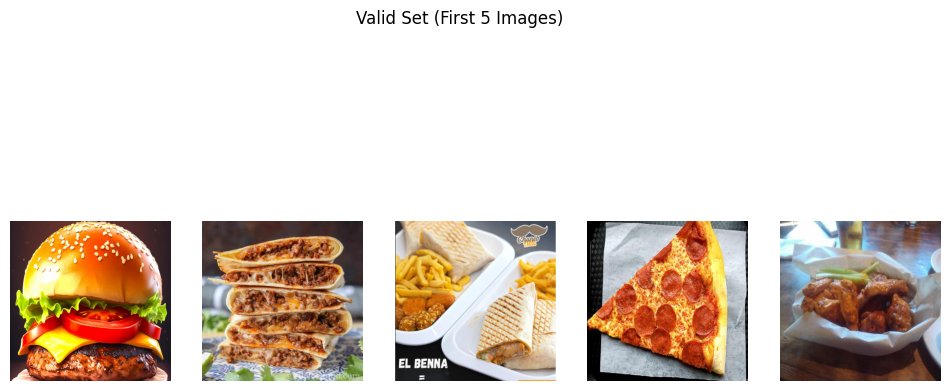

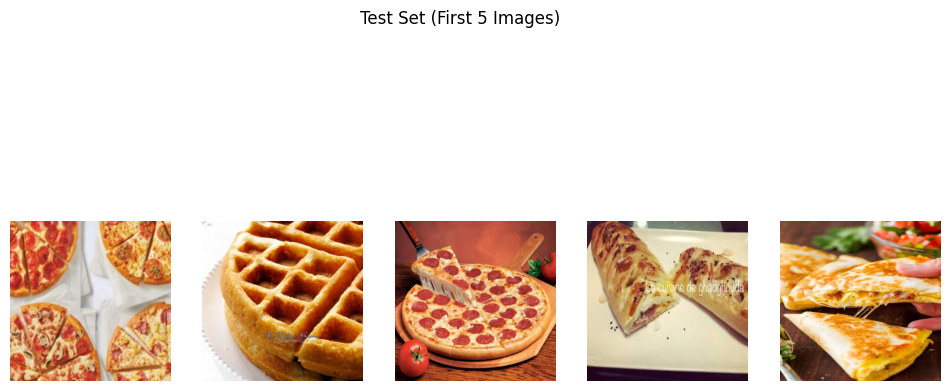

In [13]:
def display_first_few_images(directory, num_images=5):
    """Display the first few image files from the directory."""
    image_files = []
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

    # Collect all image files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))

    # Display the first `num_images` files
    return image_files[:num_images]

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Get first few images from each directory
train_images = display_first_few_images(train_dir)
valid_images = display_first_few_images(valid_dir)
test_images = display_first_few_images(test_dir)

# Function to display images
def plot_images(image_paths, title="Images"):
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(image_paths):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(image_paths), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the first few images from each set
plot_images(train_images, "Train Set (First 5 Images)")
plot_images(valid_images, "Valid Set (First 5 Images)")
plot_images(test_images, "Test Set (First 5 Images)")

The following code shows the number and different categories we have in the dataset.

In [14]:
# Path to the data.yaml file
yaml_path = "Objects_Detection--3/data.yaml"  # Adjust if necessary

# Load the YAML file
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Display the dataset information
print("Dataset Information:")
print(f"- Number of Classes: {len(data_yaml['names'])}")
print(f"- Classes: {data_yaml['names']}")

Dataset Information:
- Number of Classes: 42
- Classes: ['05L_Watter', 'Baguette_Farcie', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Citronade', 'Coca_bottle', 'Fajitas', 'Fanta_Canette', 'Fanta_botlleS', 'Frittes', 'Garlic_BreadSticks', 'Humbrger', 'Jus_Kiwi', 'Jus_fraise', 'Large_pizza', 'Makloub', 'Medium_pizza', 'MilkChake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesdillas', 'Salade', 'Smal_pizza', 'Tacos', 'Tacos_Mexicain', 'The', 'coca_Canette', 'crepes', 'croissant', 'orange-juice', 'pizza_meter', 'sprite', 'waffles']


### **To-Do: Rename the classe properly**

In [15]:
# Path to the data.yaml file
yaml_path = "Objects_Detection--3/data.yaml"

# Load the YAML file
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Correct the class names
rename_map = {
    "Humbrger": "Burger",
    "Jus_fraise": "strawberry_juice",
    "Jus_Kiwi": "Kiwi_juice",
    "Salade":"Salad",
    "The": "Tea",
    "Citronade": "Lemonade",
    "Smal_pizza": "Small_Pizza",
    "pizza_meter": "Big_Pizza",
    "Tacos_Mexicain":"Mexican_Tacos",
    "MilkChake":"Milkshake",
    "Fanta_botlleS": "Fanta_bottle",
    "Fanta_Canette": "Fanta_can",
    "Coca_bottle": "Coke_bottle",
    "05L_Watter": "Water_bottle",
    "Baguette_Farcie" : "Baguette",
    "Frittes":"French_Fries",
    "Makloub":"Maklouba",
    "Quesdillas":"Quesadillas",
    "coca_Canette":"Coke_can"
}

# Apply the renaming
data_yaml['names'] = [rename_map.get(name, name) for name in data_yaml['names']]

# Save the updated YAML file
with open(yaml_path, "w") as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print("✅ Updated class names in data.yaml!")
print(f"- Classes: {data_yaml['names']}")



✅ Updated class names in data.yaml!
- Classes: ['Water_bottle', 'Baguette', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Lemonade', 'Coke_bottle', 'Fajitas', 'Fanta_can', 'Fanta_bottle', 'French_Fries', 'Garlic_BreadSticks', 'Burger', 'Kiwi_juice', 'strawberry_juice', 'Large_pizza', 'Maklouba', 'Medium_pizza', 'Milkshake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesadillas', 'Salad', 'Small_Pizza', 'Tacos', 'Mexican_Tacos', 'Tea', 'Coke_can', 'crepes', 'croissant', 'orange-juice', 'Big_Pizza', 'sprite', 'waffles']


## **Training the base model**

In [ ]:
import os

dataset_path = "Objects_Detection--3"  # This is what we assume
print("Checking dataset contents at:", dataset_path)
print(os.listdir(dataset_path))

Checking dataset contents at: Objects_Detection--3
['data.yaml', 'valid', 'test', 'README.dataset.txt', 'README.roboflow.txt', 'train']


In [ ]:
import yaml

# Path to the YAML file
yaml_path = "Objects_Detection--3/data.yaml"

# Load and print the current YAML file contents
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

print("Current dataset paths in data.yaml:")
print(f"🔹 Train: {data_yaml.get('train', 'Not Found')}")
print(f"🔹 Val: {data_yaml.get('val', 'Not Found')}")
print(f"🔹 Test: {data_yaml.get('test', 'Not Found')}")

Current dataset paths in data.yaml:
🔹 Train: Objects_Detection--3/train/images
🔹 Val: Objects_Detection--3/valid/images
🔹 Test: Objects_Detection--3/test/images


In [ ]:
import os
print(os.listdir("Objects_Detection--3/train/images")[:10])  # Show first 10 images

['croissants329_jpg.rf.913885e4341992146b8d0487c86b8640.jpg', 'fa30_jpg.rf.766ac6780750c12bceb0f4acac33efb6.jpg', '43eb82becc109c66_jpg.rf.6fca7f8447ce3bce4aa270e87663349c.jpg', 'Screenshot-2024-08-13-at-10-12-43-PM_jpg.rf.f4d7549793c4348a0db117b1a8f5ebb1.jpg', 'pizza-recipe-1-jpg_webp.rf.5671b408f50df6827f8cf62e9550474f.jpg', '042_jpg.rf.6c98fff271f15c283dbbeb17349a6774.jpg', '60_jpg.rf.3f8aba816d7e63597edbe5de757d6b5a.jpg', 'images-2025-01-28T160605_026_jpg.rf.61eedeb6311da7b5ec36e1f065175827.jpg', 'IMG_E3296_JPG.rf.dbd3207e8e70e88fdf63d34aea84da09.jpg', '76_jpg.rf.6f177886cfc7c9f00f7e2d83f39f1ef3.jpg']


In [ ]:
import os
print(os.listdir("Objects_Detection--3/train/labels")[:10])  # Show first 10 label files

['images-66-_JPG.rf.8c56e9799e2e0d6261e4b31e78b15070.txt', 'Burritos_19_jpg.rf.dda8bade402923049570c46da57e0dbf.txt', 'croissants295_jpg.rf.84b6cf44a16af13ba3ca152d7b571456.txt', '55358_jpg.rf.8536292a3258971fe148981352310e5f.txt', '1560850_jpg.rf.16cd809c07b3cc9cfdd34adc9c25330d.txt', '58_jpg.rf.82120f782b31c9dac88905b5d8e33ce2.txt', '33_jpg.rf.0936fbe80c3833f876dcc804fdf0952f.txt', '4fa039b899160f0d_jpg.rf.19b4a08ff7cec662d3af213ef5287b07.txt', '4bfe4d5022abf941789187e6450cd9a7e6a2ec3b684409738d37f39c625b36ce_png.rf.16fd414ad1f68c7cdf0a7dde67431505.txt', '26_png.rf.56cbd732363a981e728eedf7676727da.txt']


In [ ]:
import yaml
import os

# Get absolute path of dataset
dataset_path = os.path.abspath("Objects_Detection--3")

# Path to data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")

# Load YAML and update paths
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

data_yaml["train"] = os.path.join(dataset_path, "train/images")
data_yaml["val"] = os.path.join(dataset_path, "valid/images")
data_yaml["test"] = os.path.join(dataset_path, "test/images")

# Save updated YAML
with open(yaml_path, "w") as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print("✅ Updated dataset paths with absolute paths!")

✅ Updated dataset paths with absolute paths!


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
model.train(
    data=yaml_path,
    epochs=10,
    batch=16,
    imgsz=640,
    project="YOLOv11_training",
    name="food_detection"
)

New https://pypi.org/project/ultralytics/8.3.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/Objects_Detection--3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLOv11_training, name=food_detection4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

train: Scanning /content/datasets/Objects_Detection--3/train/labels.cache... 9248 images, 62 backgrounds, 0 corrupt: 100%|██████████| 9248/9248 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4856, len(boxes) = 17008. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/datasets/Objects_Detection--3/valid/labels.cache... 667 images, 1 backgrounds, 0 corrupt: 100%|██████████| 667/667 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1315. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to YOLOv11_training/food_detection4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000217, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to YOLOv11_training/food_detection4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.81G      1.139      4.602      1.602         47        640: 100%|██████████| 578/578 [02:47<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.19it/s]

                   all        667       1315      0.613      0.144      0.146      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.74G      1.139      3.501      1.591         31        640: 100%|██████████| 578/578 [02:39<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        667       1315       0.56       0.32      0.312       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.79G      1.128      2.797      1.554         21        640: 100%|██████████| 578/578 [02:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        667       1315        0.6      0.399      0.409      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.78G      1.085      2.364      1.508         43        640: 100%|██████████| 578/578 [02:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.46it/s]

                   all        667       1315      0.564      0.502      0.483      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.75G      1.042      2.054      1.466         28        640: 100%|██████████| 578/578 [02:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]

                   all        667       1315      0.606      0.496      0.513      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.74G      1.007      1.854      1.434         24        640: 100%|██████████| 578/578 [02:37<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.71it/s]

                   all        667       1315      0.603      0.516      0.525      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.76G       0.97       1.67      1.387         30        640: 100%|██████████| 578/578 [02:39<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]

                   all        667       1315      0.597      0.578      0.567      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.74G     0.9439      1.543      1.369         22        640: 100%|██████████| 578/578 [02:38<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.70it/s]

                   all        667       1315      0.595       0.59       0.58      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.74G     0.9104       1.45      1.338         38        640: 100%|██████████| 578/578 [02:37<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]

                   all        667       1315      0.586      0.609      0.592      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.74G     0.8909      1.362      1.319         31        640: 100%|██████████| 578/578 [02:36<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        667       1315      0.656      0.607      0.611      0.455



10 epochs completed in 0.462 hours.
Optimizer stripped from YOLOv11_training/food_detection4/weights/last.pt, 5.5MB
Optimizer stripped from YOLOv11_training/food_detection4/weights/best.pt, 5.5MB

Validating YOLOv11_training/food_detection4/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,590,342 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]


                   all        667       1315      0.653      0.603      0.611      0.455
          Water_bottle         36        112       0.72      0.812      0.828      0.387
              Baguette         16         25      0.506        0.8      0.714      0.528
              Burritos          7         16      0.117     0.0625      0.215      0.141
    Chesse_BreadSticks          6         10          1          0      0.266      0.162
       Chichen_Poppers          3         13      0.279      0.154     0.0667     0.0374
        Chicken Nugget         40         75      0.975      0.973      0.992      0.859
          Chicken wing         28        239      0.622      0.569      0.572      0.316
       Chicken_Poppers          5          8      0.433      0.291      0.358      0.209
              Lemonade         12         19      0.562      0.607      0.595      0.372
               Fajitas          3          3          1          0     0.0805     0.0673
          Fanta_bottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea05b541c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,  

## **Saving the trained model in the drive**

### Note: each one has to train the model (run it locally in your notebook

### link to the model in drive

In [ ]:
https://drive.google.com/file/d/1snyA2Rnbs8xUB0Fdyu51mT4tKQJw0U-v/view?usp=sharing

## **Validation of the base model**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,429,054 parameters, 0 gradients, 21.4 GFLOPs
val: Scanning /content/datasets/Objects_Detection--3/valid/labels.cache... 667 images, 1 backgrounds, 0 corrupt: 100% 667/667 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1315. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 42/42 [00:09<00:00,  4.30it/s]
                   all        667       1315      0.598      0.717       0.68      0.523
              Water_5L         36        112      0.721      0.852      0.844      0.448
              Baguette         16         25      0.629       0.92       0.82      0.637
              Burritos   

### List of contents inside the /train2 directory

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1739123790.1c7d737d095a.12659.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


## **Using the Confusion Matrix to evaluate the Base Model**

### What to look for?


#### Diagonal Cells (Top-left to Bottom-right):

- These are the correct predictions for each class.

- The higher the value (darker blue), the better the model is at predicting this class.
Example: If the cell for "05L_Watter" (row) and "05L_Watter" (column) has a high value, the model correctly predicts "05L_Watter."

#### Off-diagonal Cells (Non-diagonal):

- These represent misclassifications.

- Example: If the "Chicken Nuggets" row has values in the "Chicken Poppers" column, the model confuses Chicken Nuggets as Chicken Poppers.

#### Class Imbalances
- If one class (e.g., **"Chicken Poppers"**) has significantly more correct predictions than others, it may mean the model is **overfitting to that class**.
- A lighter diagonal may indicate that the class has **fewer instances** or is **harder to classify**.

#### Confusions Between Similar Classes
- Look for **off-diagonal cells with high values**.
- **Example:** If **"Fanta_Canette"** is misclassified as **"Coca_bottle"**, it may indicate that these classes have **similar visual features**.

#### Background (Last Row and Column)
- The **"background"** row and column measure how well the model handles **false positives** and **false negatives**.
- If the **"background"** row has high values in non-background columns, the model is incorrectly classifying **background regions as objects**.


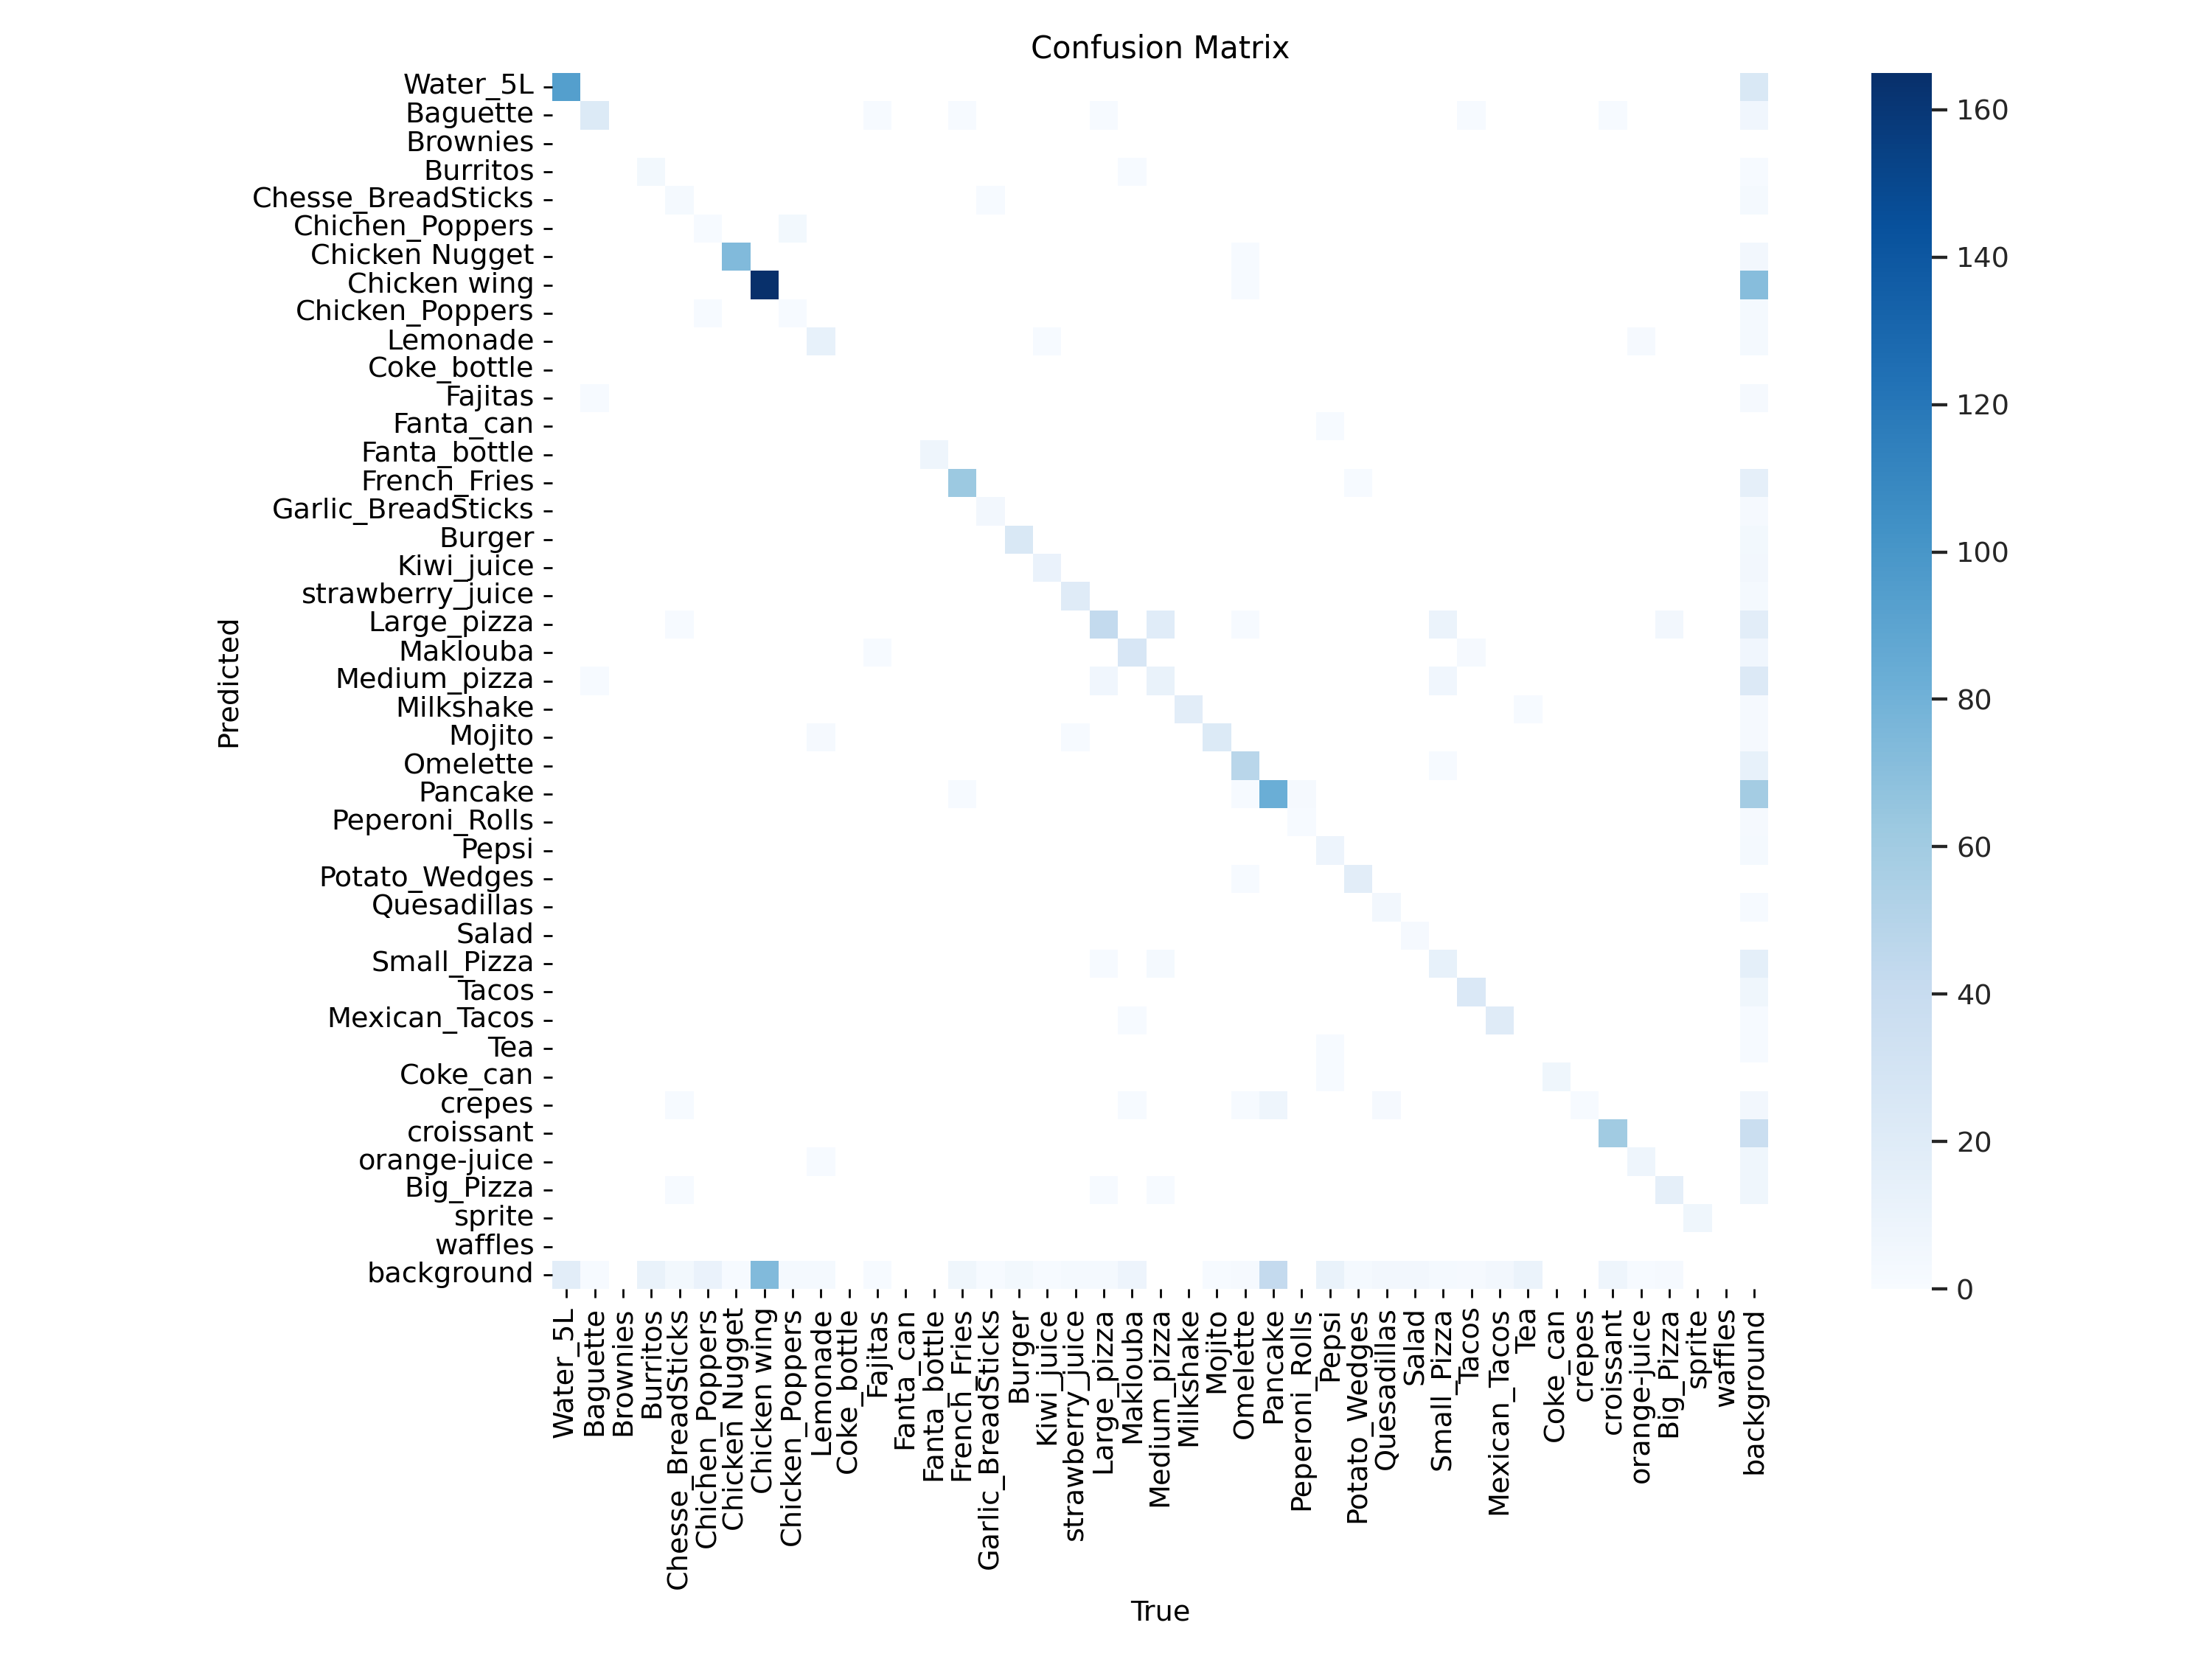

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

## **Other graphs to show the training and validation performance**

###How to read the results:
#### **1️. Training Loss**
- **`train/box_loss`:**  
  Measures how well the model predicts bounding box locations.  
  - The **lower the loss**, the more accurate the bounding boxes are.  
  - The **downward trend** indicates that the model is learning to predict bounding boxes better over time.

- **`train/cls_loss`:**  
  Measures how well the model predicts the correct class for each detected object.  
  - A **steadily decreasing trend** shows that the model is improving its classification performance.

- **`train/dfl_loss`:**  
  Refers to **distribution focal loss**, which measures the quality of bounding box regression.  
  - A **consistent decrease** means the model is getting better at refining bounding box coordinates.



#### **2️. Validation Loss**
- **`val/box_loss`:**  
  Measures bounding box prediction performance on the validation set.  
  - Should follow a **similar decreasing trend** as `train/box_loss`.  
  - If the validation loss stops decreasing or increases, it may indicate **overfitting**.

- **`val/cls_loss`:**  
  Measures classification performance on the validation set.  
  - A decrease shows that the model generalizes well to unseen data.  
  - If it stops improving or increases, it may indicate **overfitting**.

- **`val/dfl_loss`:**  
  Measures the bounding box regression quality for the validation set.  
  - Should also decrease steadily, similar to `train/dfl_loss`.



#### **3️. Precision, Recall, and mAP Metrics**
- **`metrics/precision`:**  
  Measures how many of the predicted objects are correct.  
  - A **higher precision (close to 1)** means the model is less likely to make false positive predictions.

- **`metrics/recall`:**  
  Measures how many of the actual objects the model correctly detects.  
  - A **higher recall** indicates the model is detecting more true objects.

- **`metrics/mAP50`:**  
  Mean Average Precision at **IoU=0.50**.  
  - **Higher values (closer to 1)** indicate better overall object detection performance.  
  - The smooth upward trend suggests the model is learning effectively.

- **`metrics/mAP50-95`:**  
  Mean Average Precision across IoU thresholds from **0.50 to 0.95**.  
  - A tougher evaluation metric than mAP50. Higher values indicate better performance.  
  - A steady increase indicates good generalization.


### **Key Insights**
1. **Steady Loss Decrease:**  
   - Both training and validation losses are decreasing, which shows the model is learning.  
   - There’s no significant divergence between training and validation losses, indicating no overfitting.

2. **Precision and Recall:**  
   - Both are improving over the epochs, which means the model is becoming better at detecting and classifying objects.

3. **mAP50 and mAP50-95:**  
   - mAP50 improves quickly and reaches a reasonable value (>0.7), indicating good performance at IoU=0.50.  
   - mAP50-95 is lower but still improves, which is expected as it is a more challenging metric.





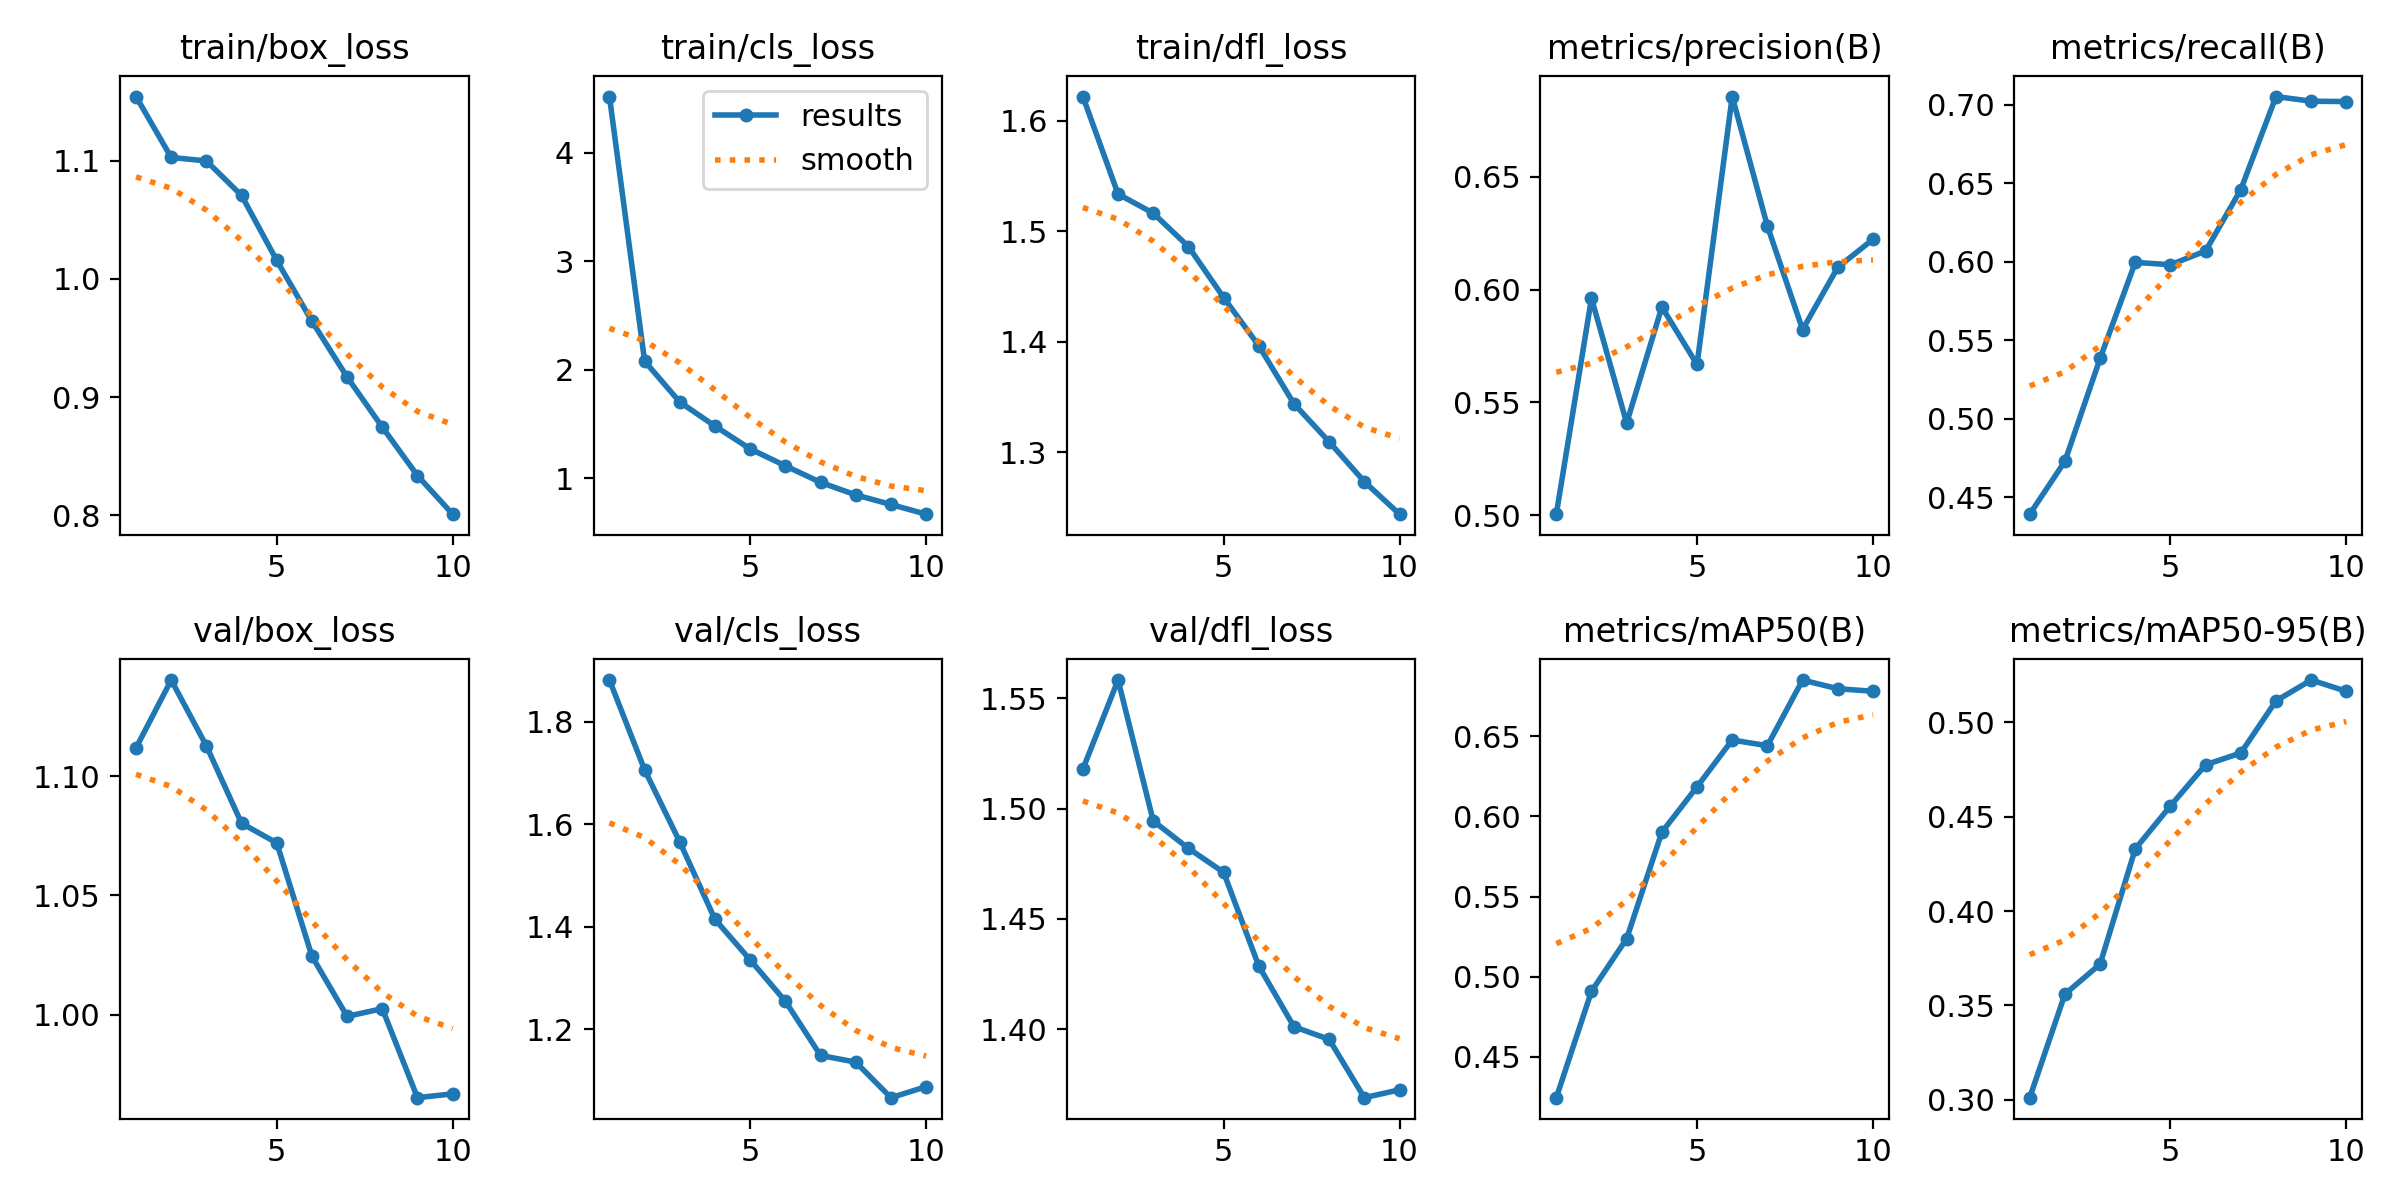

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/results.png', width=900)

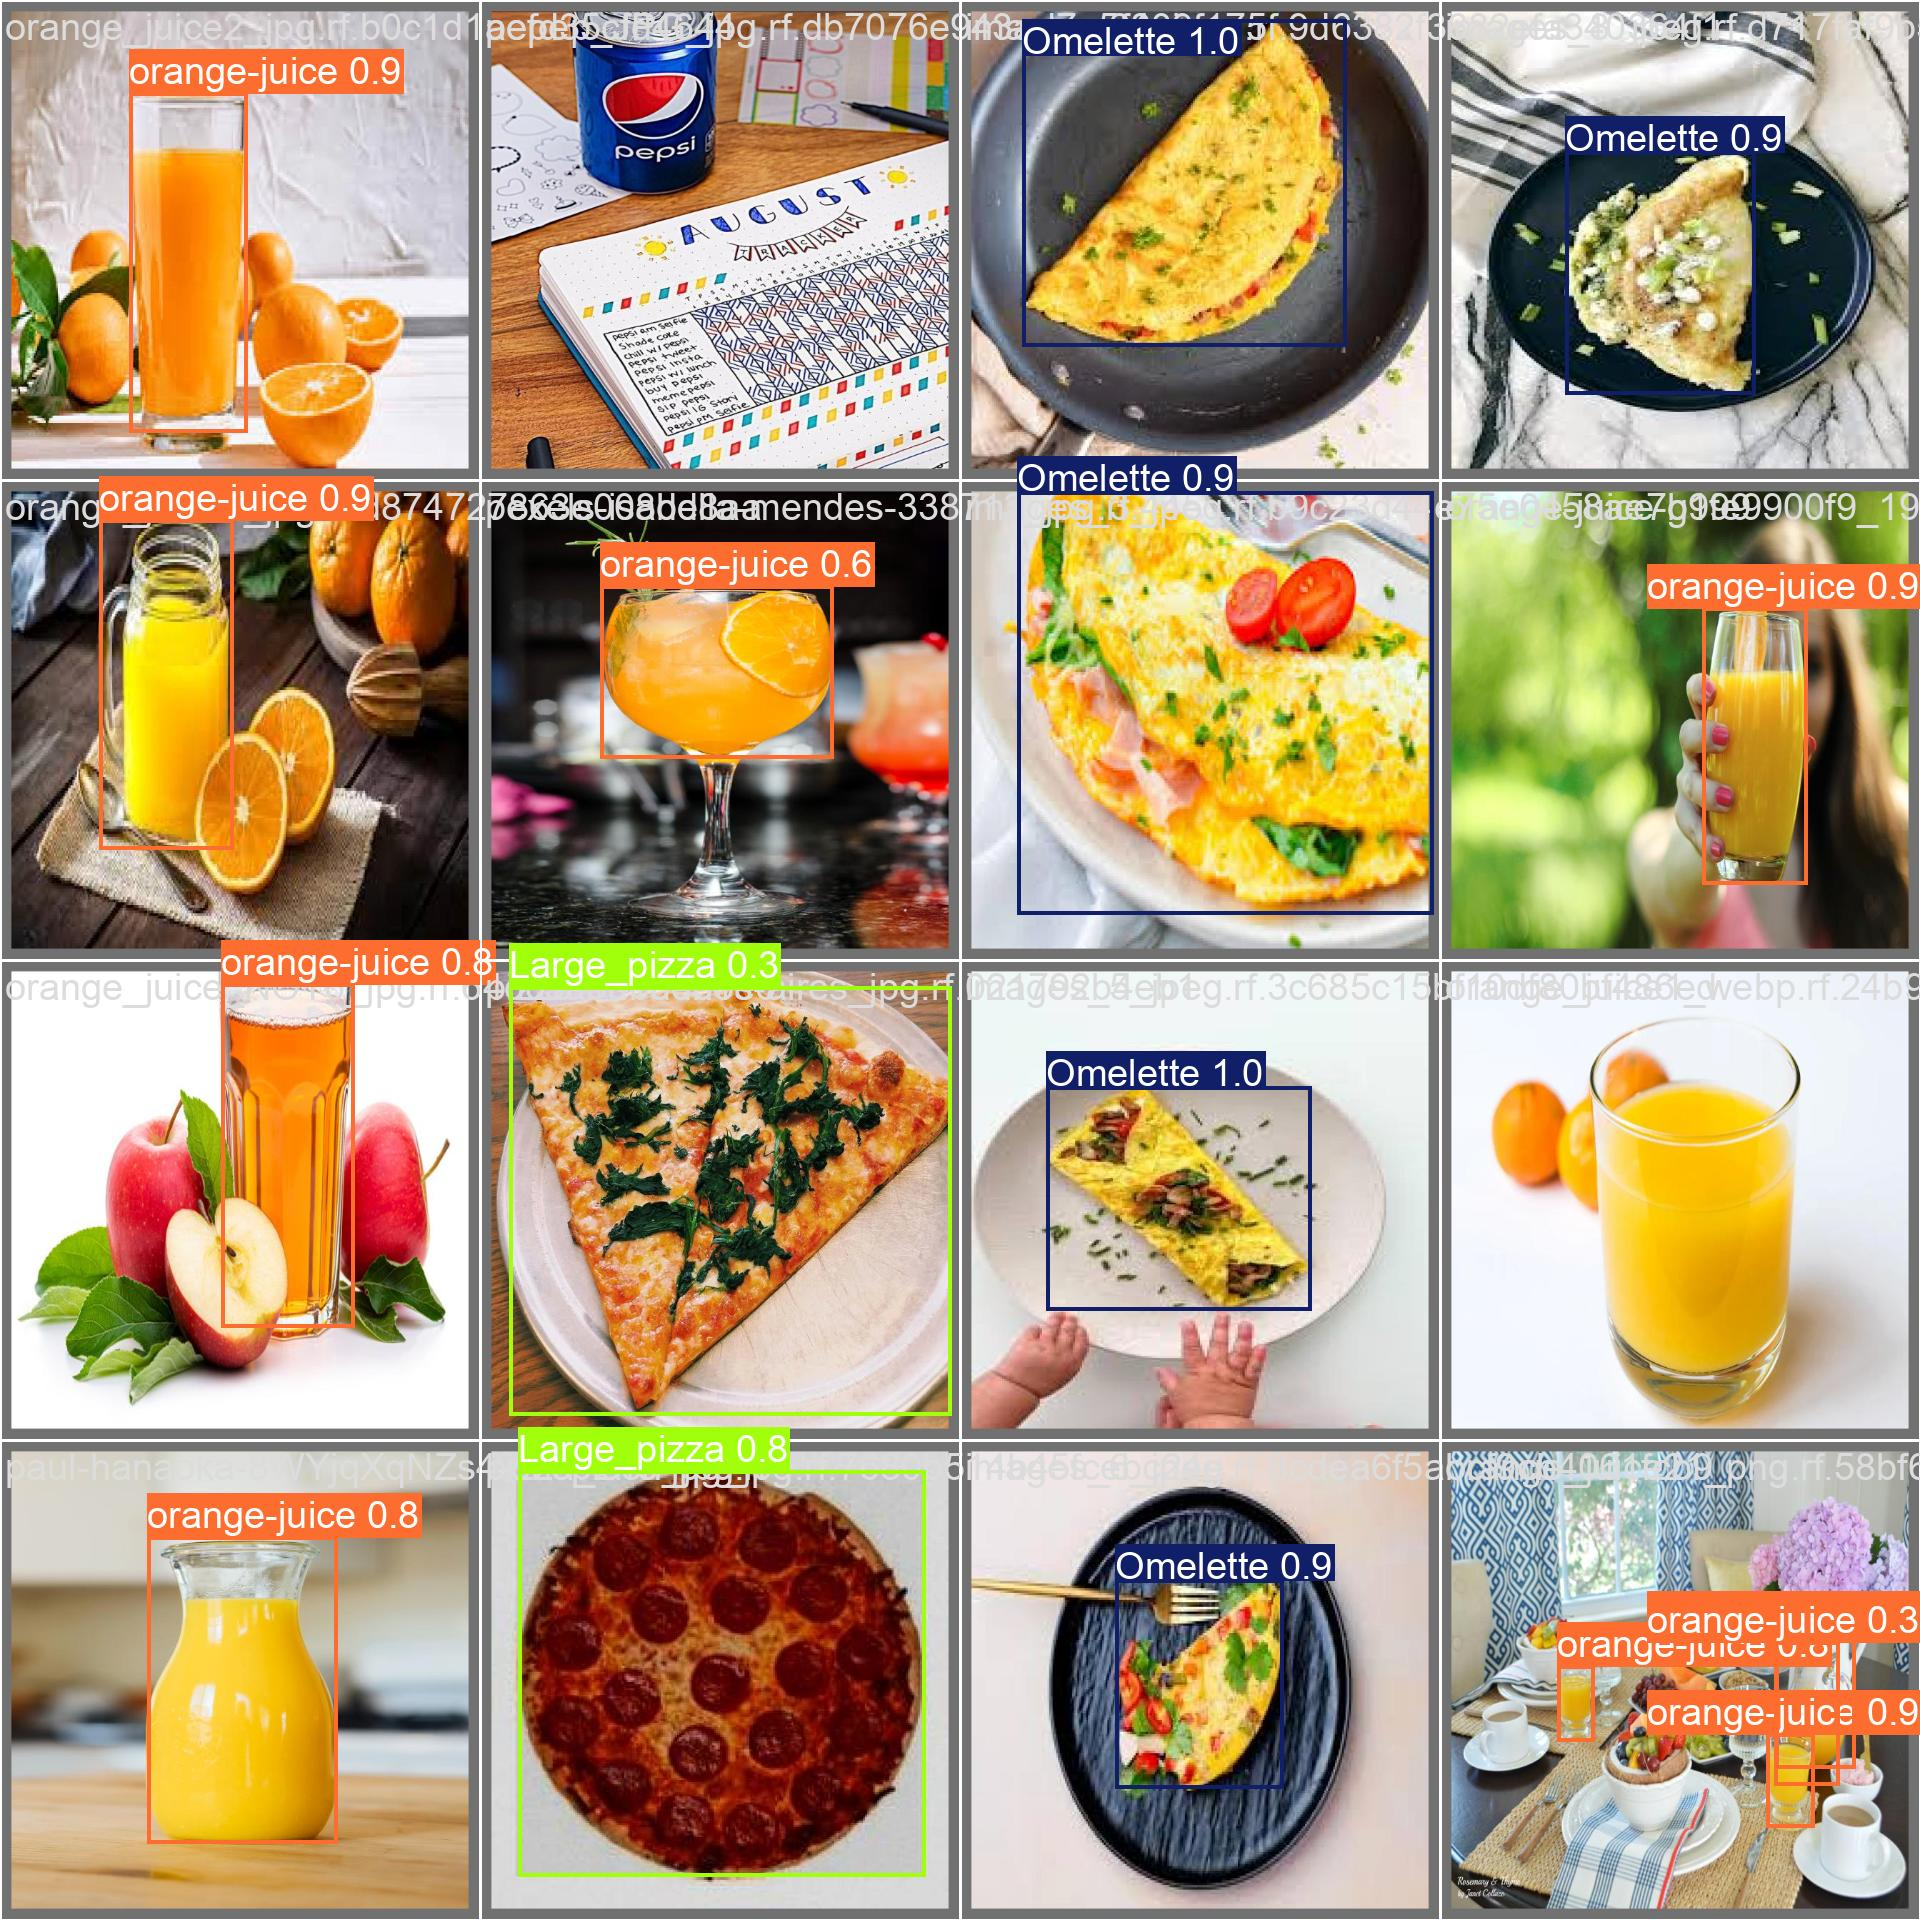

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

### **Next Steps**
1. **Monitor Further Training:**  
   - If metrics plateau, consider fine-tuning hyperparameters or increasing epochs.

2. **Check Specific Classes:**  
   - Use the confusion matrix to identify underperforming or confused classes and adjust the dataset or model accordingly.

3. **Test the Model:**  
   - Run inference on the test set to evaluate real-world performance.


## **Testing base model**

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,429,054 parameters, 0 gradients, 21.4 GFLOPs

image 1/416 /content/datasets/Objects_Detection--3/test/images/001cc5358fb67602_jpg.rf.22f8528109bcf8d74cce00a46eaa4360.jpg: 640x640 4 Pancakes, 15.8ms
image 2/416 /content/datasets/Objects_Detection--3/test/images/0157eae7b8cb1c57_jpg.rf.54ab109095e7003b32691323acd69c6a.jpg: 640x640 2 Pancakes, 15.8ms
image 3/416 /content/datasets/Objects_Detection--3/test/images/015b2fbc36b63087_jpg.rf.be3fda7534c78fb747cdecd99dc469dd.jpg: 640x640 3 Pancakes, 15.7ms
image 4/416 /content/datasets/Objects_Detection--3/test/images/01a0a727dad6c2e7156f7e67c70c94cb5e340c4c60955afe0f5a137f3bfde9e9_png.rf.dc9b2dbda579b19e970cc70cdf8df3b9.jpg: 640x640 1 Pancake, 15.7ms
image 5/416 /content/datasets/Objects_Detection--3/test/images/01cdf2231b2d1f0a4958a748fc69ebe2fae66412c9258daf123b596b2daa916c_png.rf.e927730cd0e65c0ddb4fa99c97e0cf06.jpg: 640x6

### Checking the results

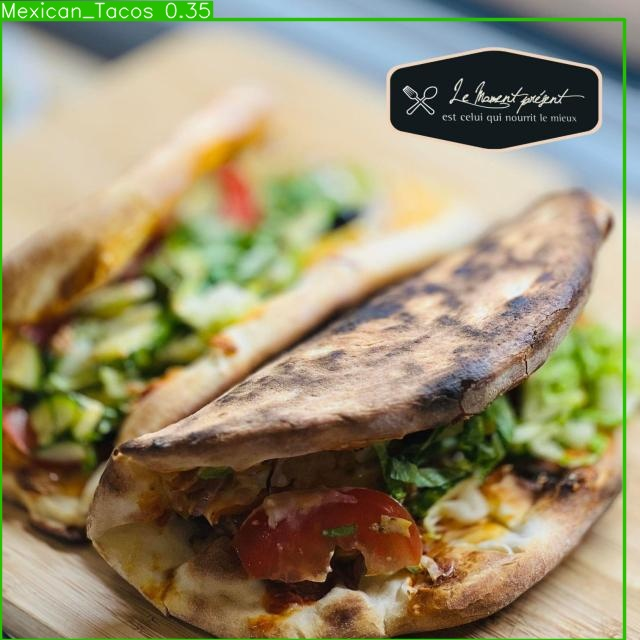

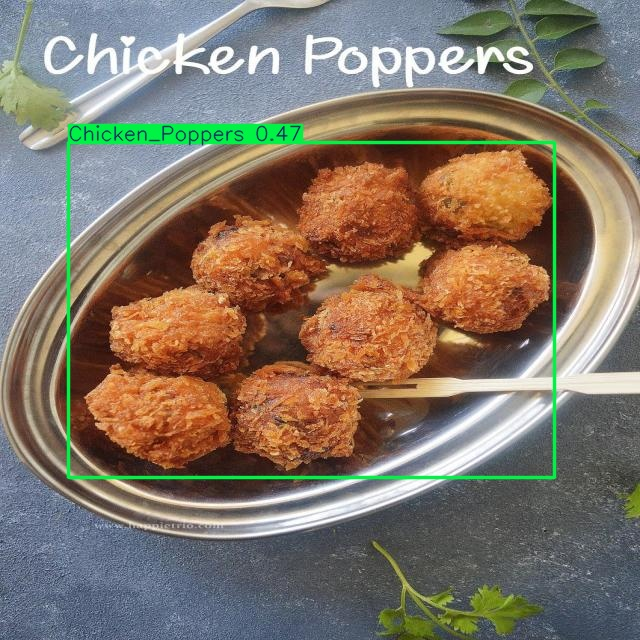

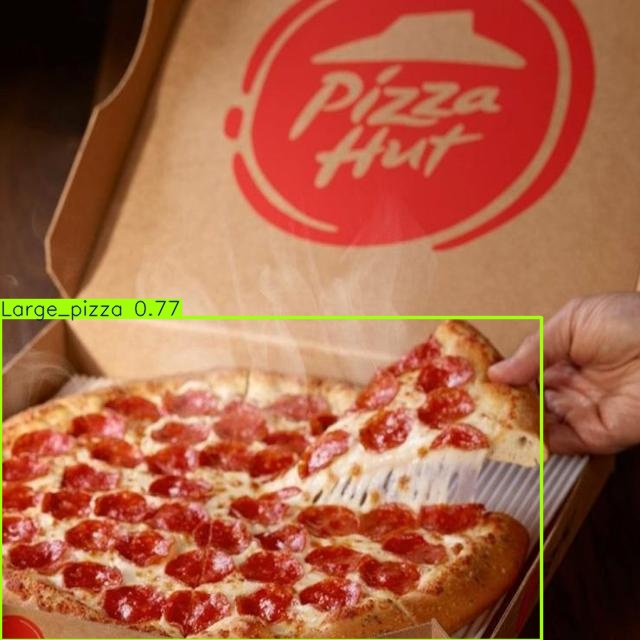

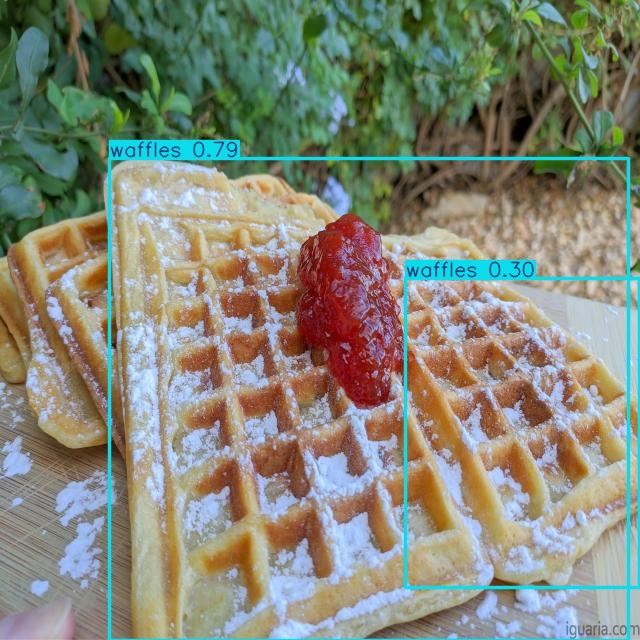

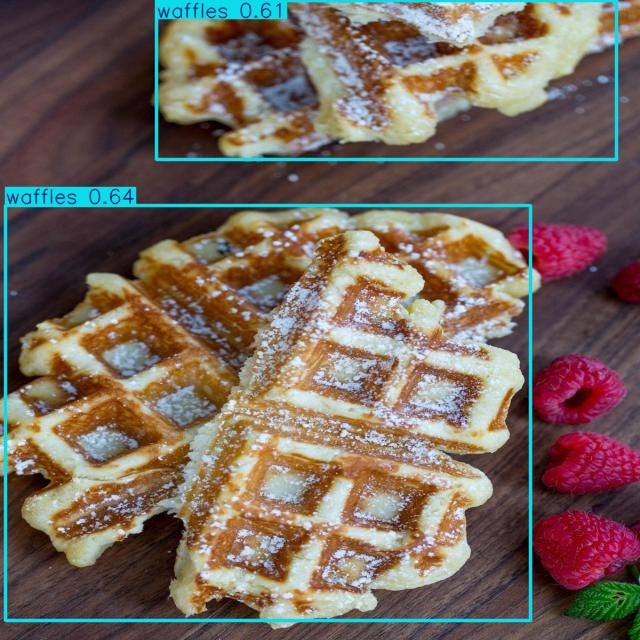

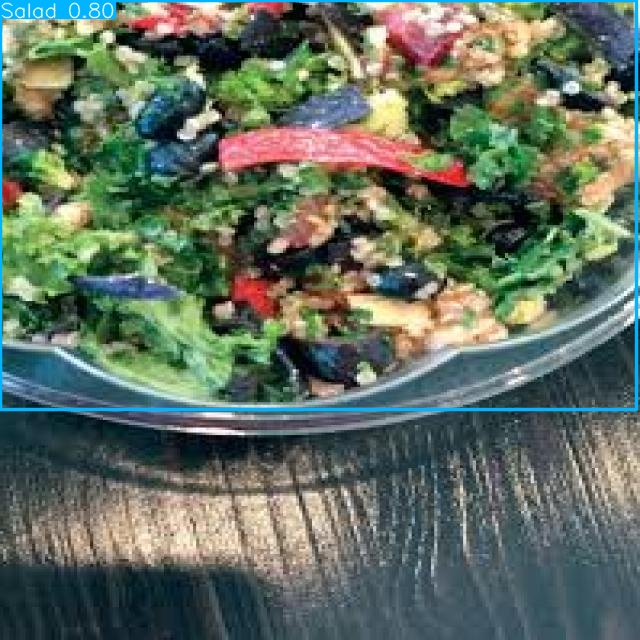

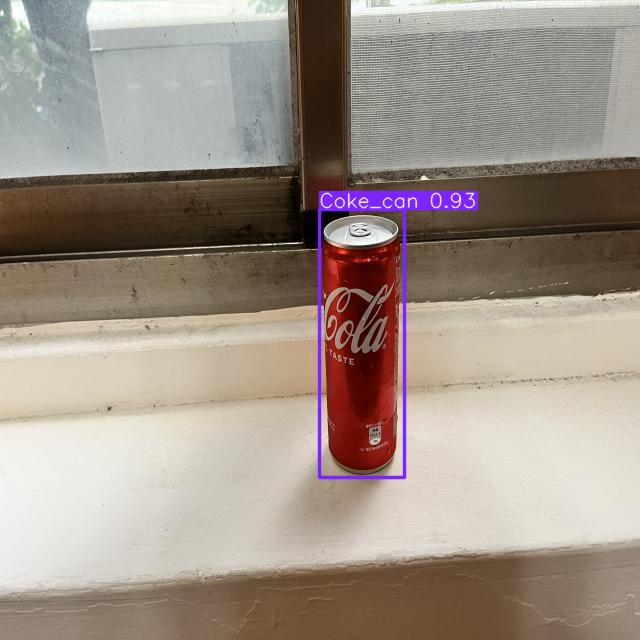

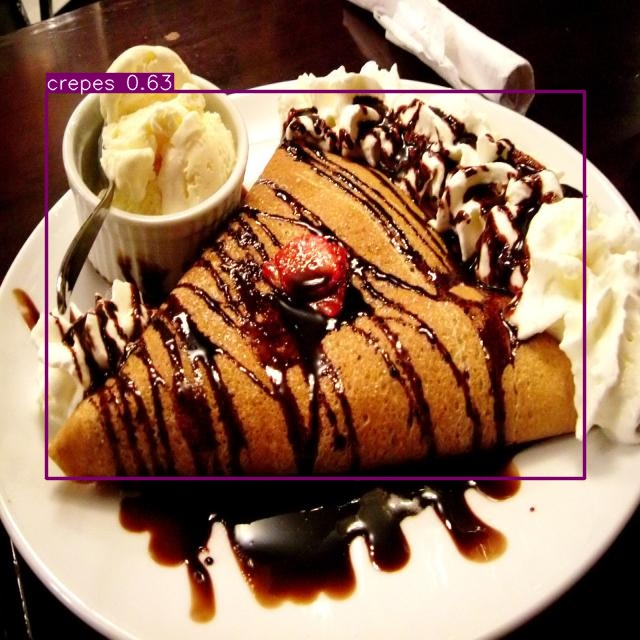

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## **Run the code from here if you want to test a batch of images using the base model!**

In [ ]:
!gdown --id 1snyA2Rnbs8xUB0Fdyu51mT4tKQJw0U-v --output best.pt
